# Aula de Regressão linear

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

## Leitura dos dados
- X representa os M³ do apartamento que possuem uma variação de 40m³ até 120 m³
- y é o preço do apartamento

In [2]:
X = np.random.randint(low=40,high=120, size=(20,1))
y = (3 * X + np.random.randint(low=100,high=150, size=(20,1))) * 1000

Text(0, 0.5, 'Preço')

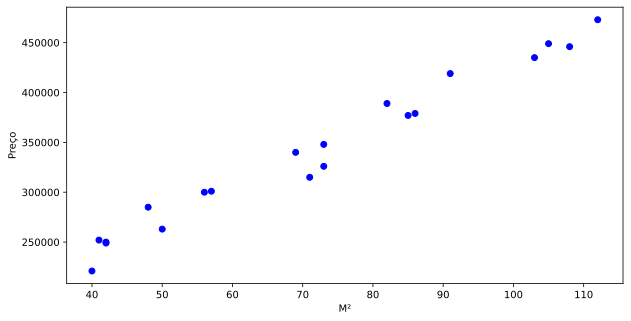

In [3]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X,y, c='b')
plt.xlabel("M²")
plt.ylabel("Preço")

## Representando uma Reta

In [6]:
def predict(alpha, beta, X):
    return alpha*X + beta

## Escolhendo melhor alpha e beta

In [7]:
tamanho = len(X)
X_b = np.c_[np.ones((tamanho, 1)), X]  # add x0 = 1 to each instance
X_b

array([[  1.,  56.],
       [  1.,  91.],
       [  1.,  40.],
       [  1.,  50.],
       [  1., 108.],
       [  1.,  71.],
       [  1.,  73.],
       [  1.,  73.],
       [  1.,  41.],
       [  1.,  86.],
       [  1.,  42.],
       [  1.,  69.],
       [  1.,  48.],
       [  1.,  42.],
       [  1.,  57.],
       [  1., 112.],
       [  1., 103.],
       [  1.,  82.],
       [  1.,  85.],
       [  1., 105.]])

In [8]:
X_b.T.dot(X_b)

array([[2.00000e+01, 1.43400e+03],
       [1.43400e+03, 1.13926e+05]])

In [9]:
#métodos dos mínimos quadrados
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[115419.26684791],
       [  3144.08274968]])

## Ajustando a reta

In [10]:
alpha = theta_best[1] #inclinação
beta = theta_best[0]

In [11]:
ỹ = predict(alpha=alpha, beta=beta, X=X)

In [12]:
ỹ

array([[291487.90083002],
       [401530.79706883],
       [241182.57683513],
       [272623.40433193],
       [454980.2038134 ],
       [338649.14207522],
       [344937.30757458],
       [344937.30757458],
       [244326.65958481],
       [385810.38332043],
       [247470.74233449],
       [332360.97657586],
       [266335.23883257],
       [247470.74233449],
       [294631.9835797 ],
       [467556.53481212],
       [439259.790065  ],
       [373234.05232171],
       [382666.30057075],
       [445547.95556436]])

## Plotando os Dados

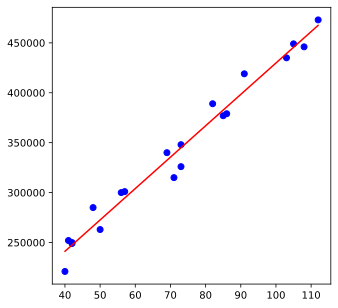

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

## Como implementar uma regressão linear usando o Scikit-learn?

In [14]:
from sklearn.linear_model import LinearRegression

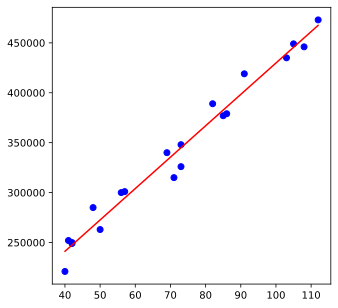

In [15]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X, y)

LinearRegression()

In [18]:
ỹ = lr.predict(X)

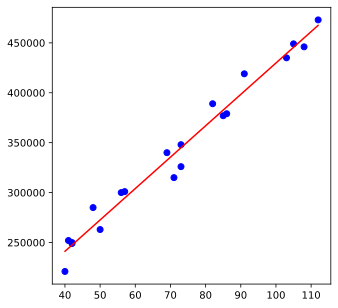

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X,y, c='b')
plt.plot(X, ỹ, 'r')

In [20]:
print("Training score: {:.2f}".format(lr.score(X, y)))

Training score: 0.98


## Avaliando meu modelo de regressão

In [21]:
from sklearn import metrics

In [22]:
print('MAE:', metrics.mean_absolute_error(y, ỹ))
print('MSE:', metrics.mean_squared_error(y, ỹ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ỹ)))

MAE: 9810.910858644977
MSE: 139357277.9568249
RMSE: 11804.96835899296
